# Лабораторная работа №1

Лабораторная работа №1 по курсу "Машинное обучение для задач информационной безопасности". </br>
Выполнил студент группы 6233-010402D Мелешенко Иван.

## Задание на лабораторную работу

1. Базовый контест (делают все хоть как-то)
    - Обучить модель без каких-либо дополнительных условий, которая должна наилучшим образом отработать на тестовой выборке преподавателя с точки зрения F-меры
2. Вторичные контесты
    - Максимально логичным образом обучить качественную модель, использующую для работы только 10 признаков из всего исходного множества.
    - Обучить модель, обеспечивающую вероятность пропуска бота на уровне не выше 0.03, и имеющую насколько возможно низкую вероятность ложного обнаружения.
3. Углубленное аналитическое исследование по имеющимся данным
    - Тем или иным способом выполнить сравнительное исследование значимости различных признаков применительно к произвольному фиксированному классификатору.
    - Синтезировать 3 или более собственных признаков на основе имеющихся и показать, что они имеют какие-либо преимущества перед хотя бы какими либо из базовых признаков.
    - Выбрать один базовый тип ML-модели на свой вкус (SVM, дерево решений, случайный лес, градиентный бустинг и пр.) и провести ROC-анализ в зависимости от её гиперпараметров.
    - Провести исследование влияние параметров обучения на недо- и переобученность модели.



## Подготовительный этап

### Подключение библиотек

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import pickle
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold, GridSearchCV
from sklearn.metrics import plot_confusion_matrix, f1_score, recall_score, precision_score, classification_report
!pip install scikit-optimize
from skopt import BayesSearchCV
import warnings
warnings.filterwarnings('ignore')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Подключение Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Загрузка данных

In [ ]:
data_features_train = pd.read_csv('/content/drive/MyDrive/datasets/features_train.csv')
data_classes_train = pd.read_csv('/content/drive/MyDrive/datasets/classes_train.csv')

### Визуальный осмотр данных

In [ ]:
data_features_train.head(7)

,statuses_count,followers_count,friends_count,favourites_count,listed_count,is_default_profile,is_profile_use_background_image,is_verified,user_age,tweets_freq,followers_growth_rate,friends_growth_rate,favourites_growth_rate,listed_growth_rate,followers_friends_ratio,screen_name_length,num_digits_in_screen_name,length_of_name,num_digits_in_name,description_length
0,5124,6641,3074,13768,126,0,0,1,2711,1.890077,2.449650,1.133899,5.078569,0.046477,2.160377,12,0,14,0,73
1,10672,8465,1575,4561,191,0,1,1,4424,2.412297,1.913427,0.356013,1.030967,0.043174,5.374603,11,0,23,0,142
2,704,3108,454,2400,77,0,0,0,1358,0.518409,2.288660,0.334315,1.767305,0.056701,6.845815,12,0,18,0,90
3,6091,304528,526,599,1515,0,1,1,4214,1.445420,72.265781,0.124822,0.142145,0.359516,578.950570,10,0,11,0,51
4,12967,13693,204,1177,452,0,1,1,3200,4.052187,4.279063,0.063750,0.367812,0.141250,67.122549,13,0,14,0,106
5,6636,7555,389,764,412,1,1,1,3372,1.967972,2.240510,0.115362,0.226572,0.122183,19.421594,9,0,7,0,155
6,590,538,815,415,5,1,1,1,3901,0.151243,0.137913,0.208921,0.106383,0.001282,0.660123,10,0,11,0,11


In [ ]:
data_classes_train.head(7)

,is_bot
0,0
1,0
2,0
3,0
4,0
5,0
6,0


### Проверка данных на пропущенные значения

In [ ]:
data_features_train.isna().sum()

statuses_count                     0
followers_count                    0
friends_count                      0
favourites_count                   0
listed_count                       0
is_default_profile                 0
is_profile_use_background_image    0
is_verified                        0
user_age                           0
tweets_freq                        0
followers_growth_rate              0
friends_growth_rate                0
favourites_growth_rate             0
listed_growth_rate                 0
followers_friends_ratio            0
screen_name_length                 0
num_digits_in_screen_name          0
length_of_name                     0
num_digits_in_name                 0
description_length                 0
dtype: int64

In [ ]:
data_classes_train.isna().sum()

is_bot    0
dtype: int64

### Разделение данных

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data_features_train, data_classes_train, test_size=0.4, random_state=1, shuffle=True)

## Задание 1. Базовый уровень

Обучить модель без каких-либо дополнительных условий, которая должна наилучшим образом отработать на тестовой выборке преподавателя с точки зрения F-меры

### Работа с моделями

В качестве эксперимента рассмотрим 3 основных и самых распространненных классификатора из пакета **sklearn**:
* ***Метод k-ближайших соседей (K-Nearest Neighbors);***
* ***Случайный лес (Random Forests);***
* ***Наивный байесовский метод (Naive Bayes);***

#### Построение моделей

In [ ]:
model_knn = KNeighborsClassifier()
model_forest = RandomForestClassifier()
model_bayes = GaussianNB()

#### Обучение моделей

In [ ]:
model_knn.fit(X_train, y_train)
model_forest.fit(X_train, y_train)
model_bayes.fit(X_train, y_train)

GaussianNB()

#### Предсказение модели

In [ ]:
predict_knn = model_knn.predict(X_test)
predict_forest = model_forest.predict(X_test)
predict_bayes = model_bayes.predict(X_test)

#### Просмотр результатов

##### KNeighborsClassifier

Metrics for KNeighborsClassifier
Precision without hypertuning for KNeighborsClassifier:  0.9770642201834863
F1-score without hypertuning for KNeighborsClassifier:  0.9551569506726457
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       732
           1       0.98      0.93      0.96       228

    accuracy                           0.98       960
   macro avg       0.98      0.96      0.97       960
weighted avg       0.98      0.98      0.98       960



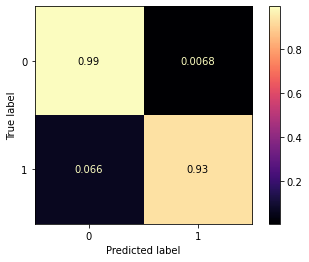

In [ ]:
print('Metrics for KNeighborsClassifier')
print("Precision without hypertuning for KNeighborsClassifier: ", precision_score(y_test, predict_knn))
print("F1-score without hypertuning for KNeighborsClassifier: ", f1_score(y_test, predict_knn))
plot_confusion_matrix(model_knn, X_test, y_test, normalize='true', cmap='magma')
print(classification_report(y_test, predict_knn))

In [ ]:
with open('/content/drive/MyDrive/models/fail_model_knn.pkl', 'wb') as f:
    pickle.dump(model_knn, f)

##### RandomForestClassifier

Metrics for RandomForestClassifier
Precision without hypertuning for RandomForestClassifier:  0.9911504424778761
F1-score without hypertuning for RandomForestClassifier:  0.9867841409691629
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       732
           1       0.99      0.98      0.99       228

    accuracy                           0.99       960
   macro avg       0.99      0.99      0.99       960
weighted avg       0.99      0.99      0.99       960



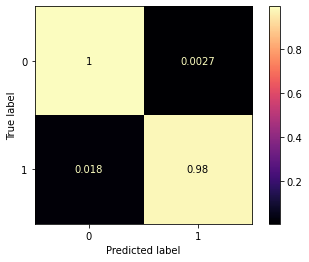

In [ ]:
print('Metrics for RandomForestClassifier')
print("Precision without hypertuning for RandomForestClassifier: ", precision_score(y_test, predict_forest))
print("F1-score without hypertuning for RandomForestClassifier: ", f1_score(y_test, predict_forest))
plot_confusion_matrix(model_forest, X_test, y_test, normalize='true', cmap='magma')
print(classification_report(y_test, predict_forest))

In [ ]:
with open('/content/drive/MyDrive/models/succ_model_forest.pkl', 'wb') as f:
    pickle.dump(model_forest, f)

##### GaussianNB

Metrics for GaussianNB
Precision without hypertuning for GaussianNB:  0.6904024767801857
F1-score without hypertuning for GaussianNB:  0.809437386569873
              precision    recall  f1-score   support

           0       0.99      0.86      0.92       732
           1       0.69      0.98      0.81       228

    accuracy                           0.89       960
   macro avg       0.84      0.92      0.87       960
weighted avg       0.92      0.89      0.90       960



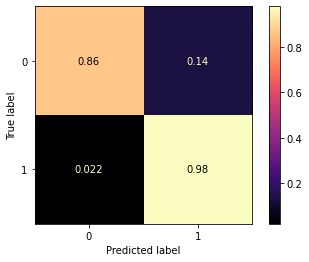

In [ ]:
print('Metrics for GaussianNB')
print("Precision without hypertuning for GaussianNB: ", precision_score(y_test, predict_bayes))
print("F1-score without hypertuning for GaussianNB: ", f1_score(y_test, predict_bayes))
plot_confusion_matrix(model_bayes, X_test, y_test, normalize='true', cmap='magma')
print(classification_report(y_test, predict_bayes))

In [ ]:
with open('/content/drive/MyDrive/models/fail_model_bayes.pkl', 'wb') as f:
    pickle.dump(model_bayes, f)

### Небольшие итоги по работе с моделями 

Все модели показывают достаточно хорошую точность предсказаний, однако есть ньюансы. <br/>
По условиям лабораторной работы модели должны пропускать ***не более 3% ботов***, с этим условием справились не все модели:
* KNeighborsClassifier пропустил почти 6,6% на данном параметре, при значении f-меры = 0.96
* RandomForestClassifier дает осечку в 1,8% при значении f-меры = 0.98
* GaussianNB так же пропускает 2,2% ботов при значении f-меры = 0.81


### Результаты

По результату выполнения задания №1 лучшим классификатором является ***RandomForestClassifier***.

## Задание 1,5. Определение 10 признаков.

### Определим топ 10 признаков

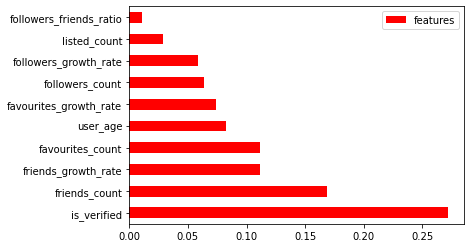

In [ ]:
feature_importances = pd.DataFrame(data=model_forest.feature_importances_, index=data_features_train.columns, columns=['features'])
feature_importances.sort_values(by='features', ascending=False, inplace=True)
feature_importances = feature_importances.head(10)
feature_importances.plot(kind='barh', colormap='autumn')

### Разделение данных

In [ ]:
new_data_features_train = data_features_train[feature_importances.index[:10]]
X_train_short, X_test_short, y_train_short, y_test_short = train_test_split(new_data_features_train, data_classes_train, test_size=0.4, random_state=0)

## Задание 2. Расширенный уровень

### 2.1 Максимально логичным образом обучить качественную модель, использующую для работы только 10 признаков из всего исходного множества.<br/>


In [ ]:
model_forest_short = RandomForestClassifier()
model_forest_short.fit(X_train_short, y_train_short)
predict_forest_short = model_forest_short.predict(X_test_short)

Metrics for RandomForestClassifier
Precision without hypertuning for RandomForestClassifier:  0.9915966386554622
F1-score without hypertuning for RandomForestClassifier:  0.9874476987447698
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       720
           1       0.99      0.98      0.99       240

    accuracy                           0.99       960
   macro avg       0.99      0.99      0.99       960
weighted avg       0.99      0.99      0.99       960



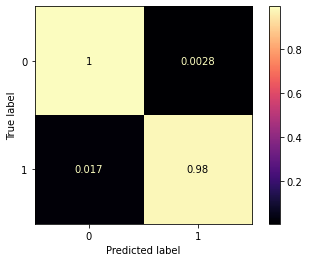

In [ ]:
print('Metrics for RandomForestClassifier')
print("Precision without hypertuning for RandomForestClassifier: ", precision_score(y_test_short, predict_forest_short))
print("F1-score without hypertuning for RandomForestClassifier: ", f1_score(y_test_short, predict_forest_short))
plot_confusion_matrix(model_forest_short, X_test_short, y_test_short, normalize='true', cmap='magma')
print(classification_report(y_test_short, predict_forest_short))

In [ ]:
with open('/content/drive/MyDrive/models/succ_model_forest_short.pkl', 'wb') as f:
    pickle.dump(model_forest_short, f)

### 2.2 Обучить модель, обеспечивающую вероятность пропуска бота на уровне не выше 0,03, и имеющую насколько возможно низкую вероятность ложного обнаружения.

#### Подбор параметров при помощи случайного поиска

In [ ]:
parameters_random = {    
 'max_depth': [i for i in range(2, 40)], 'n_estimators': [i for i in range(100, 500, 50)], 'min_samples_split':  np.linspace(0.01, 0.1, 10, endpoint=True),
 'min_samples_leaf':  np.linspace(0.01, 0.1, 10, endpoint=True), 'criterion': ['gini', 'entropy', 'log_loss'], 'max_features': ['log2', 'sqrt', 'auto'], 'random_state': [42]
}

In [ ]:
random_search_cv = RandomizedSearchCV(RandomForestClassifier(), parameters_random, scoring=['precision'], n_jobs=-1, cv=StratifiedKFold(random_state=42, shuffle=True), random_state=42, refit='precision')
random_search_cv = random_search_cv.fit(X_train_short, y_train_short)
print('Best parameters: ', random_search_cv.best_params_)
predictions_random = random_search_cv.predict(X_test_short)

Best parameters:  {'random_state': 42, 'n_estimators': 150, 'min_samples_split': 0.08, 'min_samples_leaf': 0.07, 'max_features': 'log2', 'max_depth': 21, 'criterion': 'entropy'}


Metrics for RandomForestClassifier
Precision with hypertuning for RandomForestClassifier:  0.9914893617021276
F1-score with hypertuning for RandomForestClassifier:  0.9810526315789473
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       720
           1       0.99      0.97      0.98       240

    accuracy                           0.99       960
   macro avg       0.99      0.98      0.99       960
weighted avg       0.99      0.99      0.99       960



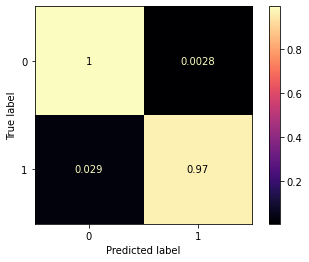

In [ ]:
print('Metrics for RandomForestClassifier')
print("Precision with hypertuning for RandomForestClassifier: ", precision_score(y_test_short, predictions_random))
print("F1-score with hypertuning for RandomForestClassifier: ", f1_score(y_test_short, predictions_random))
plot_confusion_matrix(random_search_cv, X_test_short, y_test_short, normalize='true', cmap='magma')
print(classification_report(y_test_short, predictions_random))

In [ ]:
with open('/content/drive/MyDrive/models/succ_model_forest_short_with_rand.pkl', 'wb') as f:
    pickle.dump(random_search_cv, f)

#### Подбор параметров при помощи Байесовской оптимизации

In [ ]:
parameters_for_bayes = { 'criterion': ['gini', 'entropy'], 'max_depth': [i for i in range(2, 50)], 'max_features': ['log2', 'sqrt'], 'random_state': [42] }

In [ ]:
b_search = BayesSearchCV(estimator=RandomForestClassifier(), scoring='precision', search_spaces=parameters_for_bayes, cv=3, n_iter = 110, n_jobs = -1)
b_search.fit(X_train_short, y_train_short)
print('Best parameters: ', b_search.best_params_)
predictions_bayes = b_search.predict(X_test_short)

Best parameters:  OrderedDict([('criterion', 'entropy'), ('max_depth', 16), ('max_features', 'sqrt'), ('random_state', 42)])


Metrics for RandomForestClassifier
Precision with hypertuning for RandomForestClassifier:  0.9916317991631799
F1-score with hypertuning for RandomForestClassifier:  0.989561586638831
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       720
           1       0.99      0.99      0.99       240

    accuracy                           0.99       960
   macro avg       0.99      0.99      0.99       960
weighted avg       0.99      0.99      0.99       960



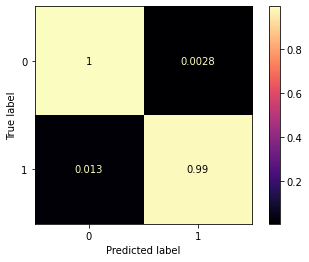

In [ ]:
print('Metrics for RandomForestClassifier')
print("Precision with hypertuning for RandomForestClassifier: ", precision_score(y_test_short, predictions_bayes))
print("F1-score with hypertuning for RandomForestClassifier: ", f1_score(y_test_short, predictions_bayes))
plot_confusion_matrix(b_search, X_test_short, y_test_short, normalize='true', cmap='magma')
print(classification_report(y_test_short, predictions_bayes))

In [ ]:
with open('/content/drive/MyDrive/models/succ_model_forest_short_with_bayes.pkl', 'wb') as f:
    pickle.dump(b_search, f)

## Итоги

Таким образом на данной конфигурации, лучший результат показывает RandomForestClassifier c подбором гиперпараметров при помощи Байесовской оптимизации. Поддреживая меру на уровне 0,99, классификатор определил бота как человека, чуть более чем в 1 проценте случаев, что является достойным результатом.